<a href="https://colab.research.google.com/github/rooban22/Classical-mechine-learning-Project/blob/main/Powergrid_stock_data_2000_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Powergrid Stock price data of the fifty stocks in NIFTY-50 index from NSE India**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importring the Dataset**

In [45]:

stk_dt = pd.read_csv('POWERGRID.csv')
stk_dt.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-10-05,POWERGRID,EQ,52.00,89.8,109.50,83.15,100.20,100.60,102.49,481058927,4.930561e+15,NaN,181390171,0.3771
1,2007-10-08,POWERGRID,EQ,100.60,104.0,104.00,94.85,95.30,95.45,98.12,71252858,6.991616e+14,NaN,22115293,0.3104
2,2007-10-09,POWERGRID,EQ,95.45,95.5,102.85,90.35,102.10,101.95,98.57,65658228,6.471784e+14,NaN,16991920,0.2588
3,2007-10-10,POWERGRID,EQ,101.95,104.6,105.00,102.00,102.65,102.90,103.66,38211410,3.960887e+14,NaN,16409289,0.4294
4,2007-10-11,POWERGRID,EQ,102.90,120.0,120.00,102.00,114.85,114.40,110.78,59805552,6.625235e+14,NaN,17530826,0.2931


**Describing The Dataset**

In [4]:
stk_dt.info()
stk_dt.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3359 entries, 0 to 3358
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3359 non-null   object 
 1   Symbol              3359 non-null   object 
 2   Series              3359 non-null   object 
 3   Prev Close          3359 non-null   float64
 4   Open                3359 non-null   float64
 5   High                3359 non-null   float64
 6   Low                 3359 non-null   float64
 7   Last                3359 non-null   float64
 8   Close               3359 non-null   float64
 9   VWAP                3359 non-null   float64
 10  Volume              3359 non-null   int64  
 11  Turnover            3359 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3359 non-null   int64  
 14  %Deliverble         3359 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 393.8

<bound method NDFrame.describe of             Date     Symbol Series  Prev Close    Open    High     Low  \
0     2007-10-05  POWERGRID     EQ       52.00   89.80  109.50   83.15   
1     2007-10-08  POWERGRID     EQ      100.60  104.00  104.00   94.85   
2     2007-10-09  POWERGRID     EQ       95.45   95.50  102.85   90.35   
3     2007-10-10  POWERGRID     EQ      101.95  104.60  105.00  102.00   
4     2007-10-11  POWERGRID     EQ      102.90  120.00  120.00  102.00   
...          ...        ...    ...         ...     ...     ...     ...   
3354  2021-04-26  POWERGRID     EQ      211.15  208.20  216.45  208.20   
3355  2021-04-27  POWERGRID     EQ      215.80  216.05  220.50  215.80   
3356  2021-04-28  POWERGRID     EQ      216.65  218.80  221.70  216.30   
3357  2021-04-29  POWERGRID     EQ      220.90  223.10  223.65  219.05   
3358  2021-04-30  POWERGRID     EQ      220.15  217.75  222.30  216.65   

        Last   Close    VWAP     Volume      Turnover   Trades  \
0     100.2

**Cleaning the Data and performing exploratory analysis**

In [46]:

to_drop = ['Trades','Deliverable Volume','%Deliverble']

stk_dt.drop(to_drop, inplace=True, axis=1)
stk_dt.info()
stk_dt.describe



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3359 entries, 0 to 3358
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        3359 non-null   object 
 1   Symbol      3359 non-null   object 
 2   Series      3359 non-null   object 
 3   Prev Close  3359 non-null   float64
 4   Open        3359 non-null   float64
 5   High        3359 non-null   float64
 6   Low         3359 non-null   float64
 7   Last        3359 non-null   float64
 8   Close       3359 non-null   float64
 9   VWAP        3359 non-null   float64
 10  Volume      3359 non-null   int64  
 11  Turnover    3359 non-null   float64
dtypes: float64(8), int64(1), object(3)
memory usage: 315.0+ KB


<bound method NDFrame.describe of             Date     Symbol Series  Prev Close    Open    High     Low  \
0     2007-10-05  POWERGRID     EQ       52.00   89.80  109.50   83.15   
1     2007-10-08  POWERGRID     EQ      100.60  104.00  104.00   94.85   
2     2007-10-09  POWERGRID     EQ       95.45   95.50  102.85   90.35   
3     2007-10-10  POWERGRID     EQ      101.95  104.60  105.00  102.00   
4     2007-10-11  POWERGRID     EQ      102.90  120.00  120.00  102.00   
...          ...        ...    ...         ...     ...     ...     ...   
3354  2021-04-26  POWERGRID     EQ      211.15  208.20  216.45  208.20   
3355  2021-04-27  POWERGRID     EQ      215.80  216.05  220.50  215.80   
3356  2021-04-28  POWERGRID     EQ      216.65  218.80  221.70  216.30   
3357  2021-04-29  POWERGRID     EQ      220.90  223.10  223.65  219.05   
3358  2021-04-30  POWERGRID     EQ      220.15  217.75  222.30  216.65   

        Last   Close    VWAP     Volume      Turnover  
0     100.20  100.60 

In [48]:
stk_dt.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,2007-10-05,POWERGRID,EQ,52.00,89.8,109.50,83.15,100.20,100.60,102.49,481058927,4.930561e+15
1,2007-10-08,POWERGRID,EQ,100.60,104.0,104.00,94.85,95.30,95.45,98.12,71252858,6.991616e+14
2,2007-10-09,POWERGRID,EQ,95.45,95.5,102.85,90.35,102.10,101.95,98.57,65658228,6.471784e+14
3,2007-10-10,POWERGRID,EQ,101.95,104.6,105.00,102.00,102.65,102.90,103.66,38211410,3.960887e+14
4,2007-10-11,POWERGRID,EQ,102.90,120.0,120.00,102.00,114.85,114.40,110.78,59805552,6.625235e+14


**graphical vishualisation** 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


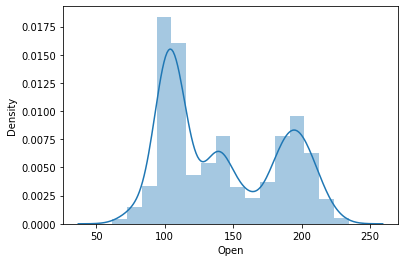

In [6]:
sns.distplot(stk_dt['Open'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


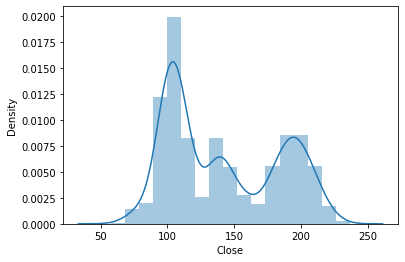

In [7]:
sns.distplot(stk_dt['Close'])

**Modeling using Supervised Learning Technique**

**Testing and Training the Data**

In [30]:
from sklearn import tree
from numpy.core.fromnumeric import reshape
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

x = stk_dt['VWAP']
y = stk_dt['Volume']



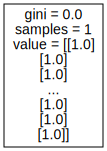

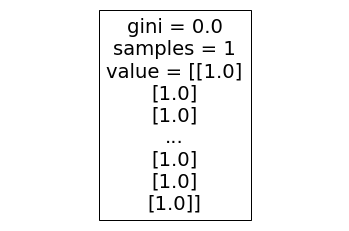

In [35]:
#before training the data we have to split our data into actual train and actual test dataset for training and validation
xtrain, xtest ,ytrain ,ytest = train_test_split(x, y, test_size = 0.30, random_state = 42)

#splitting data into validation train and validation test (optional)
xt, xcv, yt, ycv = train_test_split(xtrain, ytrain, test_size = 0.10, random_state = 42)
#clf() is the short for classifier
stk_dt_clf = DecisionTreeClassifier(criterion='gini', min_samples_split=2) #specifies the minimum number of samples required to split an internal node
stk_dt_clf.fit([xtrain],[ytrain])

#vishualised the tree on which is formed on train dataset
tree.plot_tree(stk_dt_clf)
#remember how you plot your data is important
dot_data = tree.export_graphviz(stk_dt_clf, out_file=None)

graph = graphviz.Source(dot_data)
graph
#this function is to plot the data in a clean way


[**Conclusion**]

**Power Grid Corporation of India Limited is an Indian statutory corporation under the jurisdiction of Ministry of Power, Government of India and is headquartered in Gurugram, India and engaged mainly in transmission of bulk power across different states of India. Power Grid transmits about 50% of the total power generated in India on its transmission network. It is also certified for PAS 99:.**

**POWERGRID is going to become service provider to different utilities for Advanced Metering comprising of Smart Meters, Communication System and Control Centre application on CAPEX as well as OPEX model. Battery Energy Storage Systems (BESS) is another prominent area where new investments shall be made.**